In [ ]:
import pandas as pd 
import numpy as np
from MySQLConnection import *
from tqdm import tqdm 
import FeatureSelection
import FeatureEngineering
from Preprocessing import *
import Modeling
import tensorflow as tf 
import mysql_auth

## Save data as a file

In [ ]:
# Preprocessing
# preprocessing = Preprocessing()
# input_df = preprocessing.get_data_table_from_DB()
# input_df.to_csv('input_df_all.csv')

## DNN

In [ ]:
# Preprocessing
preprocessing = Preprocessing(mysql_auth.NYXLDB_FinalStat)
input_df = preprocessing.get_data_table_from_file('input_df_all.csv')
input_df = input_df.set_index(['MatchId', 'Map', 'Section', 'TF_order', 'Timestamp', 'Team', 'Player'])
X, y = preprocessing.get_input_data_DNN_classification(
    input_df, ['UltimateCharge', 'Position_x', 'Position_y', 'Position_z'], target=['TF_winner'])

In [ ]:
# set model
dnn = Modeling.ModelDNN(X=X, y=y)
dnn.create_model()

In [ ]:
# training
dnn.train_model(num_epoch=3000, batch_size=3000, patience=300)

## LSTM

In [1]:
import pandas as pd 
import numpy as np
from MySQLConnection import *
from tqdm import tqdm 
import FeatureSelection
import FeatureEngineering
from Preprocessing import *
import Modeling
import tensorflow as tf 
from matplotlib import pyplot as plt

In [2]:
# Preprocessing
time_shift = 20
preprocessing = Preprocessing(DB_info=mysql_auth.NYXLDB_FinalStat)
input_df = preprocessing.get_data_table_from_file('input_df_all.csv')
input_df = input_df.set_index(['MatchId', 'Map', 'Section', 'Timestamp', 'Team', 'Player'])
X, y = preprocessing.get_input_data_LSTM(
    input_df, time_shift=time_shift, features=['Position_x', 'Position_y', 'Position_z'], target=['RCP'])

100%|██████████| 19/19 [02:13<00:00,  7.02s/it]
#nan in df_X:  0
#nan in df_y:  0
#nan in df_X:                Team  Player
Hero_Ana      0     0         0
                    1         0
                    2         0
                    3         0
                    4         0
                             ..
Position_z_9  1     1         0
                    2         0
                    3         0
                    4         0
                    5         0
Length: 7440, dtype: int64
#nan in df_y:  0
X shape: (93982, 7440)
y shape: (93982,)


In [3]:
# set model
lstm = Modeling.ModelLSTM(X=X, y=y, time_shift=time_shift)
lstm.create_model()

X_train shape :  (62967, 7440)
y_train shape :  (62967,)
X_test shape :  (31015, 7440)
y_test shape :  (31015,)
-------Reshape-----------
input shape: (62967, 7440)
input shape: (31015, 7440)
X_train reshape :  (62967, 20, 372)
X_test reshape :  (31015, 20, 372)
y_train reshape :  (62967, 1)
y_test reshape :  (31015, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                84600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
________________________________________________________________

: 0.0060
Epoch 2824/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 0.0049 - val_loss: 0.0059
Epoch 2825/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 0.0048 - val_loss: 0.0059
Epoch 2826/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 0.0049 - val_loss: 0.0059
Epoch 2827/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 0.0049 - val_loss: 0.0058
Epoch 2828/3000
62967/62967 [==============================] - 6s 100us/sample - loss: 0.0050 - val_loss: 0.0060
Epoch 2829/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 0.0048 - val_loss: 0.0059
Epoch 2830/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 0.0048 - val_loss: 0.0058
Epoch 2831/3000
62967/62967 [==============================] - 6s 100us/sample - loss: 0.0049 - val_loss: 0.0062
Epoch 2832/3000
62967/62967 [==============================] - 6s 101us/sample - loss: 

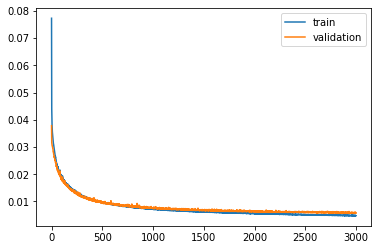

In [4]:
# training
lstm.train_model(num_epoch=3000, batch_size=3000, patience=300)

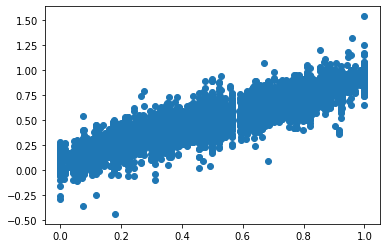

In [5]:
# evaluate model
ev = lstm.evaluate_model(lstm.X_test, lstm.y_test)

## Match Log

In [6]:
# match_preprocessing = Preprocessing(DB_info=mysql_auth.NYXL_DB_Match_FinalStat)
# match_preprocessing.DB_table_names
# input_df = match_preprocessing.get_data_table_from_DB()
# input_df.to_csv('input_df_match.csv')